**TOPIC: Understanding Pooling and Padding in CNN**

1. **Purpose and Benefits of Pooling in CNN:**
Pooling layers in Convolutional Neural Networks (CNNs) serve the purpose of reducing the spatial dimensions (width and height) of the input volume, which helps in controlling overfitting, reducing computational complexity, and extracting dominant features. The benefits of pooling include:
   - Dimensionality Reduction: Pooling aggregates the information, reducing the size of the feature maps, thus reducing the number of parameters and computation in the network.
   - Translation Invariance: Pooling makes the network less sensitive to spatial translations by selecting the most relevant features, enhancing the model's ability to generalize.
   - Feature Learning: Pooling helps in capturing the most important features by retaining the strongest activations from each region.
   - Computational Efficiency: Pooling reduces the computational load, making training and inference faster.

2. **Difference between Min Pooling and Max Pooling:**
   - Max Pooling: Max pooling selects the maximum value from each region of the input feature map. It helps in capturing the most prominent features in a given region.
   - Min Pooling: Min pooling selects the minimum value from each region of the input feature map. It highlights the least prominent features in a given region.
   Max pooling is more commonly used in CNN architectures for its effectiveness in capturing dominant features.

3. **Padding in CNN and Its Significance:**
Padding is the process of adding extra pixels around the input image to control the spatial dimensions of the output feature maps after convolution. The significance of padding includes:
   - Preservation of Spatial Information: Padding ensures that the spatial dimensions of the input and output feature maps remain consistent, allowing the network to retain important spatial information.
   - Mitigation of Information Loss: Without padding, convolution operations at the edges of the input feature map would result in reduced spatial dimensions and information loss.
   - Control Over Output Size: Padding enables controlling the spatial dimensions of the output feature maps, facilitating the design of CNN architectures with desired output sizes.

4. **Comparison of Zero-padding and Valid-padding:**
   - Zero-padding: In zero-padding, extra rows and columns of zeros are added around the input feature map. It maintains the spatial dimensions of the input and output feature maps.
   - Valid-padding: Valid-padding, also known as 'no-padding', involves applying convolution only to positions where the kernel and the input completely overlap, resulting in output feature maps with reduced spatial dimensions compared to the input.
   Zero-padding preserves spatial information and helps in controlling the output size, whereas valid-padding reduces the spatial dimensions of the output feature maps.



In [4]:
import tensorflow as tf

# Defining a simple CNN model with pooling and padding
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


2024-04-17 04:58:14.945693: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 04:58:14.950372: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 04:58:15.024352: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 04:58:16.349317: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  su

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

896

**TOPIC: Exploring LeNet**

1. **Brief Overview of LeNet-5 Architecture:**
LeNet-5 is one of the pioneering Convolutional Neural Network architectures developed by Yann LeCun et al. It was designed primarily for handwritten digit recognition tasks and consists of seven layers, including two convolutional layers followed by three fully connected layers and two subsampling (pooling) layers.

2. **Key Components of LeNet-5 and Their Purposes:**
   - Convolutional Layers: The first two layers are convolutional layers, responsible for extracting features from input images through convolution operations.
   - Subsampling Layers: LeNet-5 includes two subsampling layers, which perform down-sampling using average pooling to reduce the spatial dimensions and extract dominant features.
   - Fully Connected Layers: The last three layers are fully connected layers, which perform classification based on the features extracted by the convolutional and subsampling layers.

3. **Advantages and Limitations of LeNet-5:**
   - Advantages:
     - Effective Feature Extraction: LeNet-5 demonstrates efficient feature extraction capabilities, especially in tasks like handwritten digit recognition.
     - Lightweight Architecture: LeNet-5 has a relatively simple architecture compared to modern CNNs, making it computationally efficient.
   - Limitations:
     - Limited Capacity: Due to its shallow architecture, LeNet-5 may struggle with more complex datasets and tasks requiring deeper feature hierarchies.
     - Lack of Flexibility: LeNet-5 may not be suitable for tasks beyond simple image classification due to its fixed architecture.

4. **Implementation of LeNet-5 and Evaluation:**
   - Implementation: LeNet-5 can be implemented using deep learning frameworks such as TensorFlow or PyTorch by defining the architecture using convolutional, pooling, and fully connected layers.
   - Training: LeNet-5 can be trained on benchmark datasets such as MNIST, using techniques like stochastic gradient descent (SGD) or Adam optimizer.
   - Evaluation: The performance of LeNet-5 can be evaluated based on metrics like accuracy, precision, recall, and F1-score on a separate validation dataset.


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension to the images
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Define LeNet-5 architecture
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8722 - loss: 0.4141 - val_accuracy: 0.9792 - val_loss: 0.0641
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9796 - loss: 0.0629 - val_accuracy: 0.9859 - val_loss: 0.0453
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9860 - loss: 0.0460 - val_accuracy: 0.9840 - val_loss: 0.0503
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9892 - loss: 0.0344 - val_accuracy: 0.9876 - val_loss: 0.0348
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9907 - loss: 0.0286 - val_accuracy: 0.9883 - val_loss: 0.0351
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9845 - loss: 0.0447
Test accuracy: 0.9883000254631042


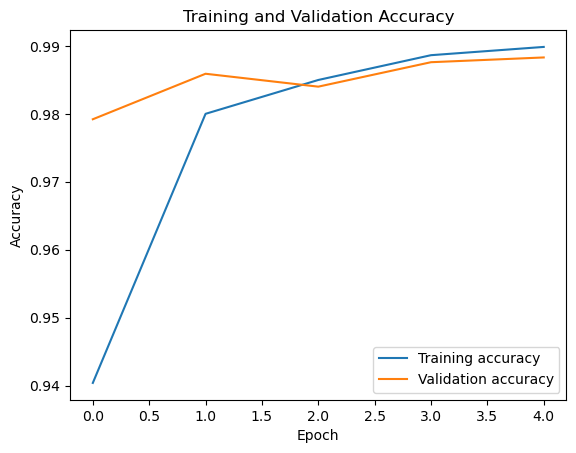

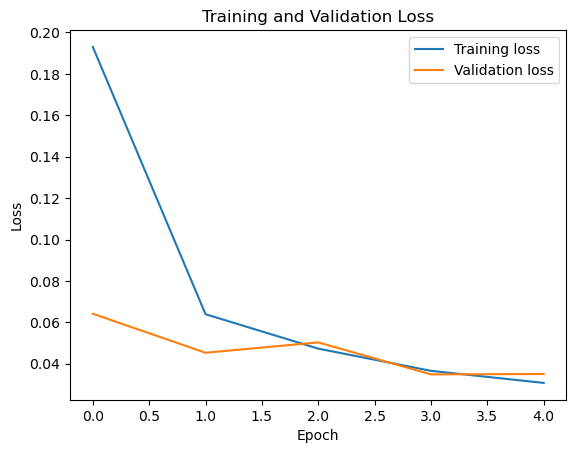

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



**TOPIC: Analyzing AlexNet**

1. **Overview of AlexNet Architecture:**
AlexNet is a deep convolutional neural network architecture introduced by Krizhevsky et al. It won the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2012, significantly advancing the state-of-the-art in image classification. AlexNet consists of eight layers, including five convolutional layers followed by three fully connected layers.

2. **Architectural Innovations in AlexNet:**
   - Deep Architecture: AlexNet introduced a deep architecture with multiple layers, allowing it to learn hierarchical features from raw pixel values.
   - Rectified Linear Units (ReLU): AlexNet used the rectified linear activation function (ReLU) instead of traditional activation functions like sigmoid, enabling faster convergence and alleviating the vanishing gradient problem.
   - Dropout Regularization: AlexNet employed dropout regularization in the fully connected layers to prevent overfitting and improve generalization performance.
   - Data Augmentation: AlexNet utilized data augmentation techniques such as random cropping and horizontal flipping to increase the diversity of training samples and improve robustness.

3. **Role of Convolutional, Pooling, and Fully Connected Layers:**
   - Convolutional Layers: Convolutional layers in AlexNet perform feature extraction by convolving learnable filters over the input image, capturing local patterns and structures.
   - Pooling Layers: Pooling layers reduce spatial dimensions and extract dominant features by performing max pooling operations over local regions.
   - Fully Connected Layers: Fully connected layers in AlexNet perform high-level feature representation and classification based on the features extracted by the convolutional and pooling layers.

4. **Implementation and Evaluation of AlexNet:**
   - Implementation: AlexNet can be implemented using deep learning frameworks like TensorFlow or PyTorch by defining the architecture and training procedure.
   - Training: AlexNet can be trained on datasets such as ImageNet using techniques like mini-batch gradient descent and learning rate scheduling.
   - Evaluation: The performance of AlexNet can be evaluated based on top-1 and top-5 accuracy metrics on a validation dataset, comparing its performance with other state-of-the-art architectures.

In [1]:
import tensorflow as tf

# Define LeNet-5 architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


2024-04-17 05:02:34.907284: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 05:02:35.141866: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 05:02:36.105233: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 05:02:38.031032: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  su

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)